In [1]:
import pandas as pd


In [2]:
cancer=pd.read_csv("lung cancer.csv")

In [3]:
cancer.describe()

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_cancer
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.752500,0.782000,0.63050,0.341500,0.139500,0.32250,0.489500,0.723000,0.737000,0.34300,0.700500,0.721500
std,0.431668,0.412991,0.48279,0.474331,0.346554,0.46755,0.500015,0.447628,0.440373,0.47483,0.458154,0.448373
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.00000,1.000000,1.000000
75%,1.000000,1.000000,1.00000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

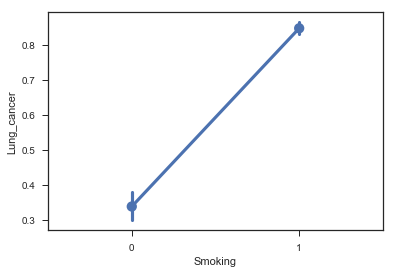

In [8]:
sns.pointplot(x="Smoking", y="Lung_cancer", data=cancer);

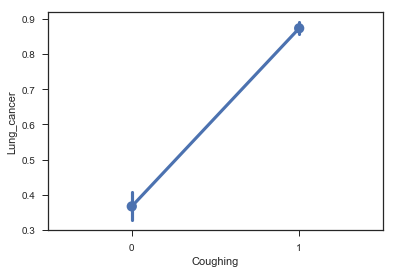

In [9]:
sns.pointplot(x="Coughing", y="Lung_cancer", data=cancer);

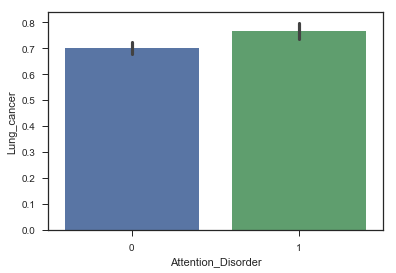

In [10]:
sns.barplot(x="Attention_Disorder", y="Lung_cancer", data=cancer);

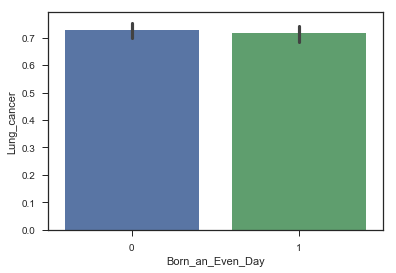

In [11]:
sns.barplot(x="Born_an_Even_Day", y="Lung_cancer", data=cancer);

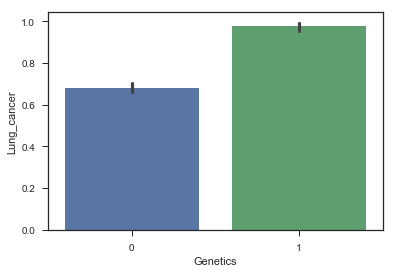

In [12]:
sns.barplot(x="Genetics", y="Lung_cancer", data=cancer);

In [13]:
import numpy as np

In [14]:
X_features=cancer.loc[:,['Smoking','Coughing']]

In [15]:
y_label=cancer['Lung_cancer'].values

In [16]:
y_label

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.3)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

In [19]:
clf = ExtraTreesClassifier(n_estimators=10000, max_depth=12, random_state=42)

In [20]:
clf = clf.fit(X_train, y_train)

In [21]:
clf.score(X_test, y_test)

0.8216666666666667

In [22]:
print(clf.feature_importances_)

[0.44989562 0.55010438]


In [23]:
predictions = clf.predict(X_test)

In [24]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.85      0.43      0.57       165
          1       0.82      0.97      0.89       435

avg / total       0.83      0.82      0.80       600



In [25]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

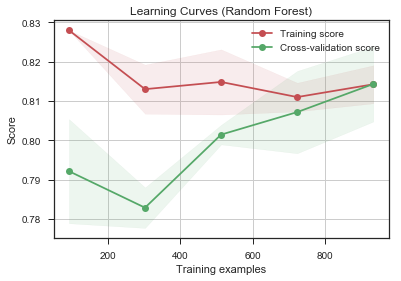

In [26]:
title = 'Learning Curves (Random Forest)'
estimator = clf
plot_learning_curve(estimator, title, X_train, y_train)
plt.show()

In [27]:
clf.get_params()

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10000,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [28]:

confusion_matrix(y_test, predictions)

array([[ 71,  94],
       [ 13, 422]], dtype=int64)

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [30]:
(tn, fp, fn, tp)

(71, 94, 13, 422)

In [31]:
y_train.shape

(1400,)

In [32]:
import tensorflow as tf
import sys
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense
model.add(Dense(units=2000, activation='relu', input_dim=2))
model.add(Dense(units=1500, activation='relu'))
model.add(Dense(units=1500, activation='relu'))
model.add(Dense(units=1500, activation='relu'))
model.add(Dense(units=1500, activation='relu'))



model.add(Dense(units=1, activation='softmax'))

F:\nff\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [35]:
model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train, epochs=20, batch_size=1600)

Epoch 1/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.2800 - acc: 0.7200
Epoch 2/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2800 - acc: 0.7200
Epoch 3/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2800 - acc: 0.7200
Epoch 4/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2800 - acc: 0.7200
Epoch 5/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2800 - acc: 0.7200
Epoch 6/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2800 - acc: 0.7200
Epoch 7/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2800 - acc: 0.7200
Epoch 8/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2800 - acc: 0.7200
Epoch 9/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2800 - acc: 0.7200
Epoch 10/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2800 - acc: 0.7200
Epoch 11/20
1400/1400 [======

In [37]:
predictions1 = model.predict(X_test)

In [38]:
confusion_matrix(y_test, predictions1)

array([[  0, 165],
       [  0, 435]], dtype=int64)

In [39]:
print(classification_report(y_test, predictions1))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       165
          1       0.72      1.00      0.84       435

avg / total       0.53      0.72      0.61       600



F:\nff\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [41]:
(tn, fp, fn, tp)

(71, 94, 13, 422)

In [42]:

# Building the LSTM
# Importing the Keras libraries and packages

from keras.layers import Dense
from keras.layers import Input, LSTM,Dropout
from keras.models import Model

In [55]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense,Flatten



model1=Sequential() # we select a sequential model for our case
model1.add(LSTM(1050,return_sequences=True, stateful=False,input_shape=(1, 2)))

model1.add(Flatten())
model1.add(Dense(1)) # output layer
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 1050)           4422600   
_________________________________________________________________
flatten_4 (Flatten)          (None, 1050)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 1051      
Total params: 4,423,651
Trainable params: 4,423,651
Non-trainable params: 0
_________________________________________________________________


In [56]:
model1.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])


In [57]:
#X_train=X_train.values
#X_train
#X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))

#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [58]:
model1.fit(X_train, y_train,epochs=50,batch_size=3000) 

Epoch 1/50
1400/1400 [==============================] - 8s 5ms/step - loss: 0.7409 - acc: 0.2800
Epoch 2/50
1400/1400 [==============================] - 1s 823us/step - loss: 0.6917 - acc: 0.2800
Epoch 3/50
1400/1400 [==============================] - 1s 828us/step - loss: 0.6445 - acc: 0.2800
Epoch 4/50
1400/1400 [==============================] - 1s 788us/step - loss: 0.5993 - acc: 0.2800
Epoch 5/50
1400/1400 [==============================] - 1s 796us/step - loss: 0.5560 - acc: 0.2800
Epoch 6/50
1400/1400 [==============================] - 1s 822us/step - loss: 0.5145 - acc: 0.2800
Epoch 7/50
1400/1400 [==============================] - 1s 869us/step - loss: 0.4748 - acc: 0.2800
Epoch 8/50
1400/1400 [==============================] - 1s 946us/step - loss: 0.4369 - acc: 0.2800
Epoch 9/50
1400/1400 [==============================] - 1s 950us/step - loss: 0.4007 - acc: 0.2800
Epoch 10/50
1400/1400 [==============================] - 1s 880us/step - loss: 0.3662 - acc: 0.2800
Epoch 11/50